In [1]:
import numpy as np
import astroML
import scipy
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform,pdist,cdist

In [2]:
import cloudpickle as pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f)

def load_obj(name ):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [3]:
colwidth = 3.404 #inches

In [4]:
# Create figures in Python that handle LaTeX, and save images to files in my
# preferred formatting. I typically place this code in the root of each of my
# projects, and import using:
# from latexify import *
# which will also run the latexify() function on the import.

# Based on code from https://nipunbatra.github.io/blog/2014/latexify.html

import matplotlib
import matplotlib.pyplot as plt
from math import sqrt

#Back-end to use depends on the system
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
# matplotlib.use('pgf')
# from matplotlib.backends.backend_pgf import FigureCanvasPgf
# matplotlib.backend_bases.register_backend('ps', FigureCanvasPgf)

import seaborn as sns
sns.set_style("white")

#my preferred palette. From
#https://seaborn.pydata.org/tutorial/color_palettes.html: "The cubehelix color
#palette system makes sequential palettes with a linear increase or decrease in
#brightness and some variation in hue. This means that the information in your
#colormap will be preserved when converted to black and white (for printing) or
#when viewed by a colorblind individual."

# I typically set the number of colors (below, 8) to the distinct colors I need
# in a given plot, so as to use the full range.
sns.set_palette(sns.cubehelix_palette(rot=-.4, reverse=False, n_colors=6, gamma=2.0))#sns.color_palette("ch:2,r=.2,l=.6"))
    #sns.color_palette("ch:2,r=.2,l=.6", n_colors=8))
    # ch:2,r=.2,l=.6
    # ch:0,r=-.2
    #sns.cubehelix_palette(sns.cubehelix_palette(n_colors=8, 
    #                                    rot=-.4)))#sns.color_palette("cubehelix", 8))


# The following is the latexify function. It allows you to create 2 column or 1
# column figures. You may also wish to alter the height or width of the figure.
# The default settings are good for most cases. You may also change the
# parameters such as labelsize and fontsize based on your classfile.
def latexify(fig_width=None, fig_height=None, columns=1, ticksize=8):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.
    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples
    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1, 2])

    if fig_width is None:
        fig_width = 6.9 if columns == 1 else 13.8  # width in inches #3.39

    if fig_height is None:
        golden_mean = (sqrt(5) - 1.0) / 2.0    # Aesthetic ratio
        fig_height = fig_width * golden_mean  # height in inches

    MAX_HEIGHT_INCHES = 16.0
    if fig_height > MAX_HEIGHT_INCHES:
        print(("WARNING: fig_height too large:" + fig_height +
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches."))
        fig_height = MAX_HEIGHT_INCHES

    params = {
            # 'backend': 'ps',
           #   'pgf.rcfonts': False,
           #   'pgf.preamble': ['\\usepackage{gensymb}', '\\usepackage[dvipsnames]{xcolor}'],
           #   "pgf.texsystem": "pdflatex",
             # 'text.latex.preamble': ['\\usepackage{gensymb}', '\\usepackage[dvipsnames]{xcolor}'],
              'text.latex.preamble': '\\usepackage{mathptmx}',
              #values below are useful defaults. individual plot fontsizes are
              #modified as necessary.
              'axes.labelsize': 8,  # fontsize for x and y labels
              'axes.titlesize': 8,
              'font.size': 8,
              'legend.fontsize': 8,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize,
              'text.usetex': True,
              'figure.figsize': [fig_width, fig_height],
              'font.family': 'DejaVu Sans',
              'font.serif': 'Times',
               'lines.linewidth': 1.5,
               'lines.markersize':1,
               'xtick.major.pad' : 2,
               'ytick.major.pad' : 2,
                'axes.xmargin' :  .0,  # x margin.  See `axes.Axes.margins`
                'axes.ymargin' : .0,  # y margin See `axes.Axes.margins`
              }

    matplotlib.rcParams.update(params)

def saveimage(name, fig = plt, extension = 'pdf', folder = 'plots/'):
    sns.despine()

    #Minor ticks off by default in matplotlib
    # plt.minorticks_off()

    #grid being off is the default for seaborn white style, so not needed.
    # plt.grid(False, axis = "x")
    # plt.grid(False, axis = "y")
    
    fig.savefig('{}{}.{}'.format(folder,name, extension), bbox_inches = 'tight')

latexify()

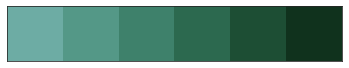

In [5]:
sns.palplot(sns.color_palette("ch:2,r=.2,l=.6"))

In [6]:
pal = sns.cubehelix_palette(rot=-.4, reverse=False, n_colors=6, gamma=2.0)
print(pal.as_hex())

['#9ccba3', '#559976', '#2b6659', '#163a3e', '#0b1921', '#04060a']


In [7]:
sns.cubehelix_palette(rot=-.4, start=0.1, reverse=False, gamma=2.0)

[[0.5949478744840798, 0.8001846535390725, 0.668855880966391],
 [0.3256111621733734, 0.5945727085465919, 0.5030924544142173],
 [0.17236188427020252, 0.3890318035424686, 0.382724778299806],
 [0.09743092218291413, 0.21687013355694665, 0.26272340906081776],
 [0.05291321944355951, 0.0902813611612516, 0.13703450318296523],
 [0.018388987175464045, 0.020996740360543546, 0.03910979335006926]]

In [8]:
# load fishers

In [5]:
F_2PCF = np.array(([[ 2275.48905284, 2304.95181558],
       [2304.95181558,  2976.81677819]]))

print('2PCF info', np.linalg.det(F_2PCF))

IMNNF_r20 = np.array([[ 3240.502 ,  6605.891 ],
             [ 6605.8916, 23552.33  ]])

print('IMNN_r20 info', np.linalg.det(IMNNF_r20))

IMNNF_r15 = np.array([[ 3563.1387,  7663.5615],
         [ 7663.5615, 25029.61  ]])

print('IMNN_r15 info', np.linalg.det(IMNNF_r15))

IMNNF_r10 = np.array([[2952.1292, 4771.753 ],
             [4771.753 , 9922.463 ]])

print('IMNN_r10 info', np.linalg.det(IMNNF_r10))

IMNNF_r5 = np.array([[1135.0378, 1980.6093],
             [1980.609 , 3654.0378]])

# np.array([[1834.0679, 3192.8257],
#              [3192.826 , 6073.7993]])


print('IMNN_r5 info', np.linalg.det(IMNNF_r5))

2PCF info 1460911.1189362435
IMNN_r20 info 32683572.602244373
IMNN_r15 info 30453797.17262478
IMNN_r10 info 6522766.065210607
IMNN_r5 info 224658.4205651401


In [6]:
cd /Users/lucas/repositories/haloGraphs/plots

/Users/lucas/repositories/haloGraphs/plots


# compare connection and update steps
Do for invariant and noninvariant graphs

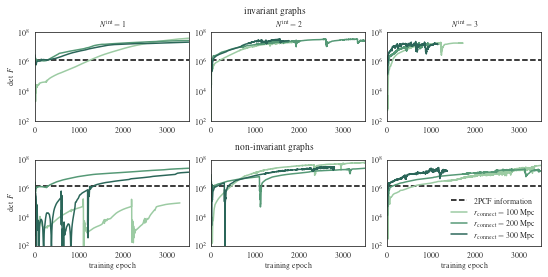

In [14]:
fig = plt.figure(figsize=(7.5, 3.74), constrained_layout=True)
#fig.suptitle('Figure title', fontsize=16)
latexify()

parent_folders = ['ind_interaction_', 'interaction_']
graphtypes = [f'invariant graphs', f'non-invariant graphs']

# create 3x1 subfigs
subfigs = fig.subfigures(nrows=2, ncols=1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle(graphtypes[row])

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=3)
    for col, ax in enumerate(axs):
        
        ax.axhline(np.linalg.det(F_2PCF), linestyle='--', color='k', label='2PCF information')
        
        if col == 0:
            ax.set_ylabel(r'$\det\ F$')

        if row == 0:
            ax.set_title(r'$N^{\rm int}=%d$'%(col+1))

        else:
            ax.set_title(f'')
            ax.set_xlabel('training epoch')
            
#         ax.set_title(r'$N_{\rm interactions}=%d$'%(col+1))
            
        for j,r in enumerate([10, 20, 30]):   
            folder = parent_folders[row] + '%d/'%(col+1)

            history = load_obj(folder + 'r%d/IMNN_history.pkl'%(r))

            ax.plot(history['val_detF'], label=r'$r_{\rm connect}=%d \rm\ Mpc$'%(r*10))
            
            ax.set_xlim(0, 3500)
            #ax.set_xlim(0, 2000)
            #plt.plot(history['detF'], label=r'IMNN, r=%d Mpc'%(r), ls='--')

        ax.set_ylim(1e2, 1e8)
        
        #ax.set_title('%d interaction steps'%(q))
        
        if (col == 2) & (row == 1):
            plt.legend(framealpha=0.0)#, bbox_to_anchor=(0.5, 1.1))

        ax.set_yscale('log')
        
    #plt.tight_layout()
#plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/connect-compare3.png', dpi=900)
#plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/connect-compare3.svg', dpi=400)

In [44]:
colwidth

3.404

Text(0, 0.5, '$\\det F$')

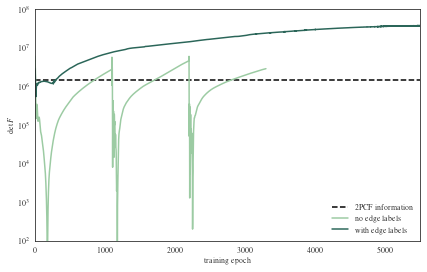

In [146]:
fig = plt.figure()

latexify(fig_width=colwidth)
parent_folders = ['ind_interaction_', 'interaction_']
graphtypes = [f'invariant graphs', f'non-invariant graphs']

folder = './interaction_1/'

radii = [20]

for r in radii:
    
    plt.axhline(np.linalg.det(F_2PCF), linestyle='--', color='k', label='2PCF information')
    
    history = load_obj(folder + 'r%d_noedge/IMNN_history.pkl'%(r))
    plt.plot(history['val_detF'], label=r'no edge labels', color='C0')
    
    history = load_obj(folder + 'r%d/IMNN_history.pkl'%(r))
    plt.plot(history['val_detF'], label=r'with edge labels', color='C2')
    
plt.yscale('log')
plt.ylim(1e2, 1e8)
plt.xlim(0, 5500)
plt.legend(framealpha=0., loc='lower right')
plt.xlabel('training epoch')
plt.ylabel(r'$\det F$')
#plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/with_without_edges.svg', dpi=400)

# fishers

In [7]:
import imnn.lfi
from tensorflow_probability.substrates import jax as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

In [8]:
lo = [0.1, 0.50]
hi = [0.5, 0.98]

prior = tfp.distributions.Blockwise(
    [tfp.distributions.Uniform(low=low, high=high)
     for low, high in zip(lo, hi)])
prior.low = np.array(lo)
prior.high = np.array(hi)

# connect comparison

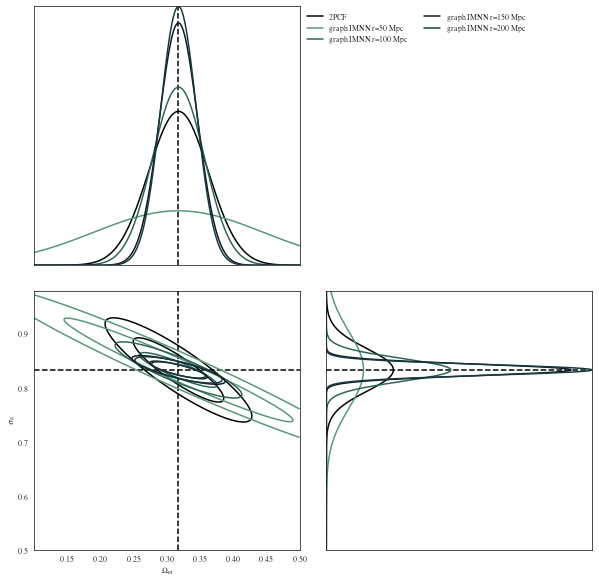

In [130]:
GA1 = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,#IMNN.get_estimate(target_data),
    invF=np.expand_dims(np.linalg.inv(F_2PCF), 0),
    prior=prior,
    
    gridsize=500)
ax = GA1.marginal_plot(
    known=θ_fid,
    label="2PCF",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="k");

GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNNF_r5), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    label="graph IMNN r=50 Mpc",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C1");


GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNNF_r10), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    label="graph IMNN r=100 Mpc",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C2");


GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNNF_r15), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    label="graph IMNN r=150 Mpc",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C4");

GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNNF_r20), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    label="graph IMNN r=200 Mpc",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C3");


plt.show()

# with and without mass

In [9]:
lo = [0.18, 0.65]
hi = [0.48, 0.98]

prior = tfp.distributions.Blockwise(
    [tfp.distributions.Uniform(low=low, high=high)
     for low, high in zip(lo, hi)])
prior.low = np.array(lo)
prior.high = np.array(hi)

In [21]:
IMNN_decorate = np.array([[ 3501.2188,  7853.18  ],
             [ 7853.1807, 35320.02  ]])

IMNN_no_decorate = np.array([[ 3051.3962,  6715.81  ],
             [ 6715.81  , 23282.832 ]])


In [22]:
θ_fid = np.array([0.3175, 0.834])

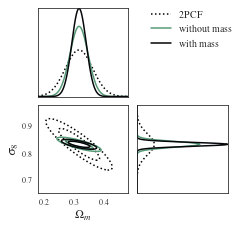

In [241]:
fig,ax = plt.subplots(figsize=(colwidth, colwidth), ncols=2, nrows=2)

latexify(fig_width=colwidth*2)

GA1 = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,#IMNN.get_estimate(target_data),
    invF=np.expand_dims(np.linalg.inv(F_2PCF), 0),
    prior=prior,
    
    gridsize=500)
GA1.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="2PCF",
    linestyle=':',
    format=True,
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="k");


GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_no_decorate), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="without mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C1");


GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_decorate), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="with mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C5");

handles, labels = plt.gca().get_legend_handles_labels()
#patch = mpatches.Patch(color='grey', label='manual patch')   
line2pcf = plt.Line2D([0], [0], label='2PCF', color='k', linestyle=':')
linenomass = plt.Line2D([0], [0], label='without mass', color='C1', linestyle='-')
linewmass  = plt.Line2D([0], [0], label='with mass', color='k', linestyle='-')
handles.extend([line2pcf, linenomass, linewmass])

plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0, 1].legend(handles=handles, framealpha=0.0, fontsize=10, 
                ncol=1, 
                bbox_to_anchor=(1.15,1.075))

ax[1,0].set_xlabel(r"$\Omega_m$", fontsize=12)
ax[1,0].set_ylabel(r"$\sigma_8$", fontsize=12)

#plt.tight_layout()


plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/F-withmass_col.svg', dpi=400)
plt.show()

In [851]:
IMNN_no_decorate / F_2PCF

array([[ 1.34098479, -2.91364442],
       [-2.91364442,  7.82138564]])

In [921]:
IMNN_decorate / F_2PCF

array([[ 1.53866651, -3.40709075],
       [-3.40709105, 11.86502987]])

In [848]:
np.linalg.det(IMNN_decorate / F_2PCF)

6.64805572492086

In [852]:
np.linalg.det(IMNN_no_decorate) / np.linalg.det(F_2PCF)

17.758124226495543

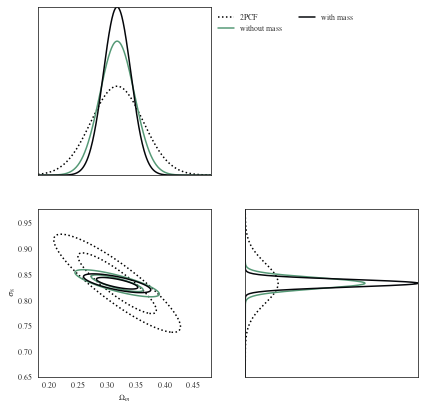

In [179]:
fig,ax = plt.subplots(figsize=(colwidth*2, colwidth*2), ncols=2, nrows=2)

latexify(fig_width=colwidth*2)

GA1 = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,#IMNN.get_estimate(target_data),
    invF=np.expand_dims(np.linalg.inv(F_2PCF), 0),
    prior=prior,
    
    gridsize=500)
GA1.marginal_plot(
    ax=ax,
    #known=θ_fid,
    label="2PCF",
    linestyle=':',
    format=True,
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="k");


GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_no_decorate), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    label="without mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C1");


GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_decorate), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    label="with mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C5");


#plt.tight_layout()


plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/F-withmass.svg', dpi=400)
plt.show()

In [169]:
np.linalg.det(IMNN_decorate) / np.linalg.det(F_2PCF)

42.43288700265925

In [174]:
np.log(np.linalg.det(IMNN_decorate))

17.942494551551945

In [244]:
np.linalg.det(IMNN_decorate) 

61990676.4307501

In [176]:
np.log(np.linalg.det(IMNN_no_decorate))

17.071413967218234

In [177]:
np.log(np.linalg.det(F_2PCF))

14.194570853109674

# with and without Mass cut noise

In [11]:
IMNN_clean = np.array([[ 3501.2188,  7853.18  ],
             [ 7853.1807, 35320.02  ]])

IMNN_cut = np.array([[ 2715.7463,  5583.9653],
             [ 5583.966 , 13672.581 ]])

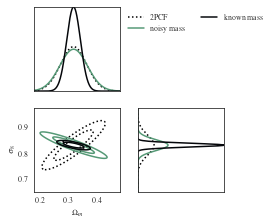

In [426]:
fig,ax = plt.subplots(figsize=(colwidth, colwidth), ncols=2, nrows=2)

latexify(fig_width=colwidth*2)

GA1 = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,#IMNN.get_estimate(target_data),
    invF=np.expand_dims(np.linalg.inv(F_2PCF), 0),
    prior=prior,
    
    gridsize=500)
GA1.marginal_plot(
    ax=ax,
    #known=θ_fid,
    label="2PCF",
    linestyle=':',
    format=True,
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="k");


GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_cut), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    label="noisy mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C1");


GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_clean), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    label="known mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C5");


#plt.tight_layout()


#plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/F-cutmass-compare.svg', dpi=400)
plt.show()

# with isomass contours

In [12]:
lo = [0.18, 0.68]
hi = [0.45, 0.95]

prior = tfp.distributions.Blockwise(
    [tfp.distributions.Uniform(low=low, high=high)
     for low, high in zip(lo, hi)])
prior.low = np.array(lo)
prior.high = np.array(hi)

In [13]:
oms = np.load('new_oms.npy')
s8s = np.load('fitted_s8.npy')
x = np.load('x.npy')
#x = x[x > prior.low[0]]
#x = x[x < prior.high[0]]
y = np.load('y.npy')
#y = y[y > prior.low[1]]
#y = y[y < prior.high[1]]
dndms = np.load('dndms.npy')
fsigmas = np.load('fsigmas.npy')
int_dndms = np.load('int_dndms.npy')
int_dndms_end = np.load('int_dndms_end.npy')

dndms2 = np.load('dndms2.npy')
fsigmas2 = np.load('fsigmas2.npy')
int_dndms2 = np.load('int_dndms2.npy')
int_dndms_end2 = np.load('int_dndms_end2.npy')
int_fsigmas_end2 = np.load('int_fsigmas_end2.npy')

In [14]:
dndms.shape

(40, 40)

<a list of 3 text.Text objects>

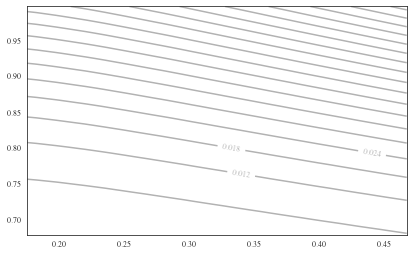

In [527]:
dndms = dndms #np.array(dndms).reshape(x.shape)
contours = plt.contour(x, y, (fsigmas), levels=19, colors='black', alpha=0.3)
plt.clabel(contours, inline=True, fontsize=8, levels=contours.levels[2:5])

In [498]:
contours.levels

array([0.00e+00, 8.00e-23, 1.60e-22, 2.40e-22, 3.20e-22, 4.00e-22,
       4.80e-22, 5.60e-22, 6.40e-22, 7.20e-22, 8.00e-22, 8.80e-22,
       9.60e-22, 1.04e-21, 1.12e-21, 1.20e-21, 1.28e-21, 1.36e-21,
       1.44e-21])

In [930]:
%matplotlib inline

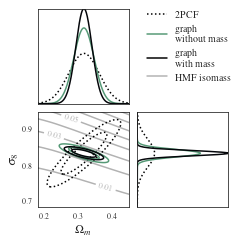

In [1009]:
fig,ax = plt.subplots(figsize=(colwidth, colwidth), ncols=2, nrows=2)

latexify(fig_width=colwidth*2)

dndms = dndms #np.array(dndms).reshape(x.shape)
contours = ax[1,0].contour(x, y, (fsigmas2), levels=12, colors='black', alpha=0.3, zorder=10)
ind = [1, 3, 5]
manual_locs = [(0.385, 0.75), (0.23, 0.89), (0.284, 0.95)]
plt.clabel(contours, inline=True, fontsize=8, levels=contours.levels[ind], use_clabeltext=True, 
           manual=manual_locs,
           inline_spacing=1.9)


GA1 = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,#IMNN.get_estimate(target_data),
    invF=np.expand_dims(np.linalg.inv(F_2PCF), 0),
    prior=prior,
    
    gridsize=500)
GA1.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="2PCF",
    linestyle=':',
    format=True,
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="k");



GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_no_decorate), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="without mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C1");


GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_decorate), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="with mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C5");

handles, labels = plt.gca().get_legend_handles_labels()

line2pcf = plt.Line2D([0], [0], label='2PCF', color='k', linestyle=':')
linenomass = plt.Line2D([0], [0], label='graph\nwithout mass', color='C1', linestyle='-')
linewmass  = plt.Line2D([0], [0], label='graph\nwith mass', color='k', linestyle='-')
hmfline = plt.Line2D([0], [0], label=r'HMF isomass', color='gray', linestyle='-', alpha=0.6)

handles.extend([line2pcf, linenomass, linewmass, hmfline])

plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0, 1].legend(handles=handles, framealpha=0.0, fontsize=10, 
                ncol=1, 
                bbox_to_anchor=(1.13,1.075))

ax[1,0].set_xlabel(r"$\Omega_m$", fontsize=12)
ax[1,0].set_ylabel(r"$\sigma_8$", fontsize=12)



plt.tight_layout()


#plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/F-withmass-fsigma.svg', dpi=400)
plt.show()

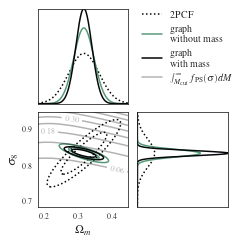

In [1144]:
fig,ax = plt.subplots(figsize=(colwidth, colwidth), ncols=2, nrows=2)

latexify(fig_width=colwidth*2)

dndms = dndms #np.array(dndms).reshape(x.shape)
contours = ax[1,0].contour(x, y, (int_fsigmas_end2), levels=14, colors='black', alpha=0.3, zorder=10)
ind = [1, 3, 5]
manual_locs = [(0.41, 0.75), (0.21, 0.89), (0.284, 0.95)]
plt.clabel(contours, inline=True, fontsize=8, levels=contours.levels[ind], use_clabeltext=True, 
           manual=manual_locs,
           inline_spacing=1.9)


GA1 = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,#IMNN.get_estimate(target_data),
    invF=np.expand_dims(np.linalg.inv(F_2PCF), 0),
    prior=prior,
    
    gridsize=500)
GA1.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="2PCF",
    linestyle=':',
    format=True,
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="k");



GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_no_decorate), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="without mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C1");


GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_decorate), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="with mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C5");

handles, labels = plt.gca().get_legend_handles_labels()

line2pcf = plt.Line2D([0], [0], label='2PCF', color='k', linestyle=':')
linenomass = plt.Line2D([0], [0], label='graph\nwithout mass', color='C1', linestyle='-')
linewmass  = plt.Line2D([0], [0], label='graph\nwith mass', color='k', linestyle='-')
hmfline = plt.Line2D([0], [0], label=r'$\int^\infty_{M_{\rm cut}} f_{\rm PS}(\sigma) dM$', color='gray', linestyle='-', alpha=0.6)

handles.extend([line2pcf, linenomass, linewmass, hmfline])

plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0, 1].legend(handles=handles, framealpha=0.0, fontsize=10, 
                ncol=1, 
                bbox_to_anchor=(1.13,1.075))

ax[1,0].set_xlabel(r"$\Omega_m$", fontsize=12)
ax[1,0].set_ylabel(r"$\sigma_8$", fontsize=12)



plt.tight_layout()

plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/F-withmass-intfsigma.png', dpi=900)
plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/F-withmass-intfsigma.svg', dpi=400)
plt.show()

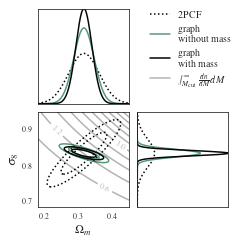

In [1047]:
fig,ax = plt.subplots(figsize=(colwidth, colwidth), ncols=2, nrows=2)

latexify(fig_width=colwidth*2)

dndms = dndms #np.array(dndms).reshape(x.shape)
contours = ax[1,0].contour(x, y, (int_dndms_end2), levels=15, colors='black', alpha=0.3, zorder=10)
ind = [1, 2, 5]
manual_locs = [(0.385, 0.75), (0.23, 0.89), (0.41, 0.83)]
plt.clabel(contours, inline=True, fontsize=8, levels=contours.levels[ind], use_clabeltext=True, 
           manual=manual_locs,
           inline_spacing=1.9)


GA1 = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,#IMNN.get_estimate(target_data),
    invF=np.expand_dims(np.linalg.inv(F_2PCF), 0),
    prior=prior,
    
    gridsize=500)
GA1.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="2PCF",
    linestyle=':',
    format=True,
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="k");



GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_no_decorate), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="without mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C1");


GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_decorate), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="with mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C5");

handles, labels = plt.gca().get_legend_handles_labels()

line2pcf = plt.Line2D([0], [0], label='2PCF', color='k', linestyle=':')
linenomass = plt.Line2D([0], [0], label='graph\nwithout mass', color='C1', linestyle='-')
linewmass  = plt.Line2D([0], [0], label='graph\nwith mass', color='k', linestyle='-')
hmfline = plt.Line2D([0], [0], label=r'$\int^\infty_{M_{\rm cut}} \frac{dn}{dM} dM$', color='gray', linestyle='-', alpha=0.6)
#hmfline = plt.Line2D([0], [0], label=r'isomass HMF', color='gray', linestyle='-', alpha=0.6)

handles.extend([line2pcf, linenomass, linewmass, hmfline])

plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0, 1].legend(handles=handles, framealpha=0.0, fontsize=10, 
                ncol=1, 
                bbox_to_anchor=(1.13,1.075))

ax[1,0].set_xlabel(r"$\Omega_m$", fontsize=12)
ax[1,0].set_ylabel(r"$\sigma_8$", fontsize=12)



plt.tight_layout()


plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/F-withmass-int-dndm.svg', dpi=400)
plt.show()

In [1076]:
pal = sns.cubehelix_palette(rot=-.4, reverse=False, n_colors=6, gamma=2.0)
print(pal.as_hex())

['#9ccba3', '#559976', '#2b6659', '#163a3e', '#0b1921', '#04060a']


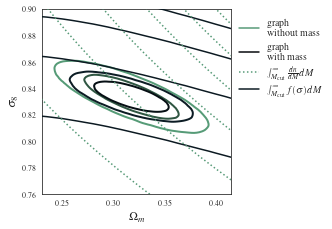

In [1141]:
fig,ax = plt.subplots(figsize=(colwidth,colwidth), nrows=1, ncols=1) #plt.subplots(figsize=(colwidth, colwidth), ncols=2, nrows=2)

latexify(fig_width=colwidth)

contours = ax.contour(x, y, (int_fsigmas_end2), levels=14, colors='#0b1921', alpha=1.0, zorder=10)
ind = [1, 3, 5]
manual_locs = [(0.41, 0.75), (0.21, 0.89), (0.284, 0.95)]
#plt.clabel(contours, inline=True, fontsize=8, levels=contours.levels[ind], use_clabeltext=True, 
#           manual=manual_locs,
#           inline_spacing=1.9)

contours = ax.contour(x, y, (int_dndms_end2), levels=15, colors='#559976', alpha=1.0, zorder=10, linestyles=':')
ind = [1, 2, 5]
manual_locs = [(0.385, 0.75), (0.23, 0.89), (0.41, 0.83)]
#plt.clabel(contours, inline=True, fontsize=8, levels=contours.levels[ind], use_clabeltext=True, 
#           manual=manual_locs,
#           inline_spacing=1.9)


cs = ChainConsumer()
#cs.add_chain(delfi['super_post'][500::90], parameters=params, name='DELFI + IMNN')
# add GA
params = [r'$\Omega_c$', r"$\sigma_8$"]
cs.add_covariance(θ_fid, np.linalg.inv(IMNN_no_decorate), shade=False,
                  parameters=params, name="GA Estimate", color="#559976")

cs.add_covariance(θ_fid, np.linalg.inv(IMNN_decorate), shade=False,
                  parameters=params, name="GA Estimate", color="#0b1921")

cs.configure(smooth=1.5, linestyles=["-", "-"], linewidths=[2.0, 2.0],
        shade=[True, False], shade_alpha=[0.0, 0.0], tick_font_size=8)

cs.plotter.plot_contour(ax, r"$\Omega_c$", r"$\sigma_8$")

ax.set_ylim(0.76, 0.9)
ax.set_xlim(0.23, 0.415)

handles, labels = plt.gca().get_legend_handles_labels()

line2pcf = plt.Line2D([0], [0], label='2PCF', color='k', linestyle=':')
linenomass = plt.Line2D([0], [0], label='graph\nwithout mass', color='C1', linestyle='-')
linewmass  = plt.Line2D([0], [0], label='graph\nwith mass', color='C5', linestyle='-')
dndmline = plt.Line2D([0], [0], label=r'$\int^\infty_{M_{\rm cut}} \frac{dn}{dM} dM$', color='#559976', linestyle=':', alpha=1.0)
fsigmaline = plt.Line2D([0], [0], label=r'$\int^\infty_{M_{\rm cut}} f(\sigma) dM$', color='#0b1921', linestyle='-', alpha=1.0)
# #hmfline = plt.Line2D([0], [0], label=r'isomass HMF', color='gray', linestyle='-', alpha=0.6)

handles.extend([linenomass, linewmass, dndmline, fsigmaline])

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.legend(handles=handles, framealpha=0.0, fontsize=10, 
                ncol=1,
                bbox_to_anchor=(1.52,1.0))

ax.set_xlabel(r"$\Omega_m$", fontsize=12)
ax.set_ylabel(r"$\sigma_8$", fontsize=12)

#plt.tight_layout()

plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/fsigma-dndms-comp.png', 
            dpi=900, bbox_inches='tight')

plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/fsigma-dndms-comp.svg', 
            dpi=400, bbox_inches='tight')





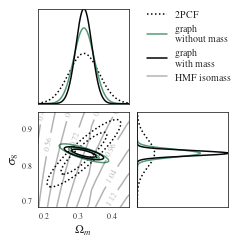

In [999]:
fig,ax = plt.subplots(figsize=(colwidth, colwidth), ncols=2, nrows=2)

latexify(fig_width=colwidth*2)

dndms = dndms #np.array(dndms).reshape(x.shape)
contours = ax[1,0].contour(x, y, (int_dndms), levels=12, colors='black', alpha=0.3, zorder=10)
ind = [1, 3, 5]
#manual_locs = [(0.385, 0.75), (0.23, 0.89), (0.284, 0.95)]
plt.clabel(contours, inline=True, fontsize=8, levels=contours.levels, use_clabeltext=True, 
           manual=False,
           inline_spacing=1.9)


GA1 = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,#IMNN.get_estimate(target_data),
    invF=np.expand_dims(np.linalg.inv(F_2PCF), 0),
    prior=prior,
    
    gridsize=500)
GA1.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="2PCF",
    linestyle=':',
    format=True,
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="k");



GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_no_decorate), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="without mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C1");


GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_decorate), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="with mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C5");

handles, labels = plt.gca().get_legend_handles_labels()

line2pcf = plt.Line2D([0], [0], label='2PCF', color='k', linestyle=':')
linenomass = plt.Line2D([0], [0], label='graph\nwithout mass', color='C1', linestyle='-')
linewmass  = plt.Line2D([0], [0], label='graph\nwith mass', color='k', linestyle='-')
hmfline = plt.Line2D([0], [0], label=r'HMF isomass', color='gray', linestyle='-', alpha=0.6)

handles.extend([line2pcf, linenomass, linewmass, hmfline])

plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0, 1].legend(handles=handles, framealpha=0.0, fontsize=10, 
                ncol=1, 
                bbox_to_anchor=(1.13,1.075))

ax[1,0].set_xlabel(r"$\Omega_m$", fontsize=12)
ax[1,0].set_ylabel(r"$\sigma_8$", fontsize=12)



plt.tight_layout()


#plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/F-withmass-fsigma.svg', dpi=400)
plt.show()

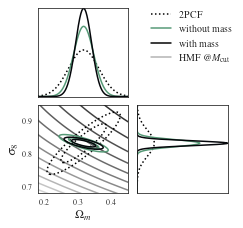

In [471]:
fig,ax = plt.subplots(figsize=(colwidth, colwidth), ncols=2, nrows=2)

latexify(fig_width=colwidth*2)

dndms = dndms #np.array(dndms).reshape(x.shape)
ax[1,0].contour(x, y, np.log(dndms), levels=19, cmap='gray_r', alpha=0.98)

GA1 = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,#IMNN.get_estimate(target_data),
    invF=np.expand_dims(np.linalg.inv(F_2PCF), 0),
    prior=prior,
    
    gridsize=500)
GA1.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="2PCF",
    linestyle=':',
    format=True,
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="k");


GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_no_decorate), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="without mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C1");


GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(IMNN_decorate), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="with mass",
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="C5");

handles, labels = plt.gca().get_legend_handles_labels()
#patch = mpatches.Patch(color='grey', label='manual patch')   
line2pcf = plt.Line2D([0], [0], label='2PCF', color='k', linestyle=':')
linenomass = plt.Line2D([0], [0], label='without mass', color='C1', linestyle='-')
linewmass  = plt.Line2D([0], [0], label='with mass', color='k', linestyle='-')
hmfline = plt.Line2D([0], [0], label='HMF @$M_{}$', color='gray', linestyle='-', alpha=0.6)

handles.extend([line2pcf, linenomass, linewmass, hmfline])

plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0, 1].legend(handles=handles, framealpha=0.0, fontsize=10, 
                ncol=1, 
                bbox_to_anchor=(1.15,1.075))

ax[1,0].set_xlabel(r"$\Omega_m$", fontsize=12)
ax[1,0].set_ylabel(r"$\sigma_8$", fontsize=12)

#plt.tight_layout()


#plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/F-withmass-contour.svg', dpi=400)
plt.show()

# plot SBI and then generalization (for w/mass)

In [1147]:
resultsfolder = './noisy_mass/interaction_2/noise0/' #'./interaction_2/r20/' # './noisy_mass/interaction_2/noise5/'
test_derv_estimates = np.load(resultsfolder + 'test_derv_estimates.npy')
test_derv = load_obj('./testgraphs/test_derv_graphs.pkl')

In [1148]:
test_derv_estimates.shape

(800, 2)

In [1149]:
test_derv.n_node.shape

(1, 800, 1)

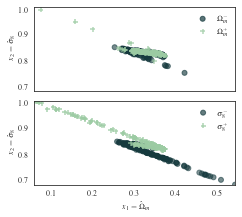

In [1150]:
fig,axs = plt.subplots(nrows=2, ncols=1, sharey=True, sharex=True)
latexify(fig_width=colwidth, fig_height=0.9*colwidth)
_maxnodes = np.max(test_derv.n_node)

ax = axs[0]
ax.scatter(test_derv_estimates[::4, 0], test_derv_estimates[::4, 1], color='C3', s=25,
           label=r'$\Omega_m^-$', marker='o', alpha=test_derv.n_node[0, ::4] / _maxnodes)

ax.scatter(test_derv_estimates[2::4, 0], test_derv_estimates[2::4, 1], color='C6', s=25,
           label=r'$\Omega_m^+$', marker='+', alpha=test_derv.n_node[0, 2::4] / _maxnodes)
#ax.set_xlabel(r'$x_1 = \hat{\Omega}_m$')
ax.set_ylabel(r'$x_2 = \hat{\sigma}_8$')
ax.legend(framealpha=0.)

ax = axs[1]
ax.scatter(test_derv_estimates[1::4, 0], test_derv_estimates[1::4, 1], color='C3', s=25,
           label=r'$\sigma_8^-$', alpha=test_derv.n_node[0, 1::4] / _maxnodes)

ax.scatter(test_derv_estimates[3::4, 0], test_derv_estimates[3::4, 1], color='C6', s=25,
           label=r'$\sigma_8^+$', marker='+', alpha=test_derv.n_node[0, 3::4] / _maxnodes)
ax.legend(framealpha=0.)
ax.set_xlabel(r'$x_1 = \hat{\Omega}_m$')
ax.set_ylabel(r'$x_2 = \hat{\sigma}_8$')
plt.tight_layout()
plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/summary_scatter.png', dpi=900)
plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/summary_scatter.svg', dpi=400)
# ax.set_ylabel(r'$x_2 = \hat{\sigma}_8$')

# generalization

In [922]:
resultsfolder = './generalization/' #'./interaction_2/r20/' # './noisy_mass/interaction_2/noise5/'

radii = [17, 30]

test_derv_estimates_general = [np.load(resultsfolder + 'test_derv_estimates_general_r%d.npy'%(r)) for r in radii]
#test_derv = load_obj('./testgraphs/test_derv_graphs.pkl')

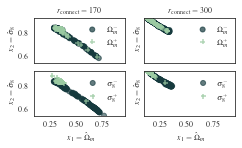

In [923]:
fig,axs = plt.subplots(nrows=2, ncols=2, sharey=True, sharex=True)
latexify(fig_width=colwidth) #, fig_height=0.76*colwidth)
_maxnodes = np.max(test_derv.n_node)

for i,r in enumerate(radii):
    ax = axs[0, i]
    test_derv_estimates = test_derv_estimates_general[i]
    
    ax.scatter(test_derv_estimates[::4, 0], test_derv_estimates[::4, 1], color='C3', s=25,
               label=r'$\Omega_m^-$', marker='o', alpha=test_derv.n_node[0, ::4] / _maxnodes)

    ax.scatter(test_derv_estimates[2::4, 0], test_derv_estimates[2::4, 1], color='C6', s=25,
               label=r'$\Omega_m^+$', marker='+', alpha=test_derv.n_node[0, 2::4] / _maxnodes)

    ax.set_ylabel(r'$x_2 = \hat{\sigma}_8$')
    ax.legend(framealpha=0.)
    ax.set_title(r'$r_{\rm connect}=%d$'%(r*10))


    ax = axs[1, i]
    ax.scatter(test_derv_estimates[1::4, 0], test_derv_estimates[1::4, 1], color='C3', s=25,
               label=r'$\sigma_8^-$', alpha=test_derv.n_node[0, 1::4] / _maxnodes)

    ax.scatter(test_derv_estimates[3::4, 0], test_derv_estimates[3::4, 1], color='C6', s=25,
               label=r'$\sigma_8^+$', marker='+', alpha=test_derv.n_node[0, 3::4] / _maxnodes)
    ax.legend(framealpha=0.)
    
    ax.set_xlabel(r'$x_1 = \hat{\Omega}_m$')
    ax.set_ylabel(r'$x_2 = \hat{\sigma}_8$')
    
    ax.set_xlim(0.1, 0.96)

plt.tight_layout()
plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/summary_general.svg', dpi=400)
# ax.set_ylabel(r'$x_2 = \hat{\sigma}_8$')

# training curves for masscut

Text(0, 0.5, '$\\det F$')

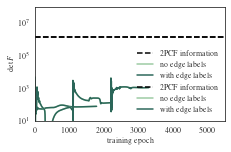

In [156]:
fig = plt.figure()

latexify(fig_width=colwidth)
parent_folders = ['masscut_nomass/', 'masscut/']
graphtypes = [f'invariant graphs', f'non-invariant graphs']

folder = 'interaction_1/'

radii = [20]

for p in parent_folders:
    
    f = p + folder
    
    for r in radii:

        plt.axhline(np.linalg.det(F_2PCF), linestyle='--', color='k', label='2PCF information')

        history = load_obj(f + 'r%d/IMNN_history.pkl'%(r))
        plt.plot(history['val_detF'], label=r'no edge labels', color='C0')

        history = load_obj(f + 'r%d/IMNN_history.pkl'%(r))
        plt.plot(history['val_detF'], label=r'with edge labels', color='C2')
    
plt.yscale('log')
plt.ylim(1e1, 1e8)
plt.xlim(0, 5500)
plt.legend(framealpha=0., loc='lower right')
plt.xlabel('training epoch')
plt.ylabel(r'$\det F$')
#plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/with_without_edges.svg', dpi=400)

# fixed vs variable length catalogs

In [905]:
# first all fixed-length catalogs
topfolder = 'fixed_length/'

# no mass
epistemic_folders = [topfolder + 'masscut_nomass/big_interaction_2/' + 'k%d/'%(i+1) for i in range(5)]
aleatoric_folders = [topfolder + 'masscut_nomass/big_interaction_2/' + 'trainval_k%d/'%(i+1) for i in range(5)]


Fs_no_mass_ep = [np.load(f + 'IMNN_F.npy') for f in epistemic_folders]
Fs_no_mass_al = [np.load(f + 'IMNN_F.npy') for f in aleatoric_folders]

dets_no_mass_ep = [np.log(np.linalg.det(f)) for f in Fs_no_mass_ep]
dets_no_mass_al = [np.log(np.linalg.det(f)) for f in Fs_no_mass_al]

In [909]:
masscut_results = {'fixed': {
                
                'mass':{},
                'nomass':{},
    
                },
                  'vary': {  
                      'mass':{},
                      'nomass':{},
                  },
}

for _c in ['fixed', 'vary']:
    topfolder = '%s_length/'%(_c)
    
    masslabs = ['nomass', 'mass']
    for i,_m in enumerate(['_nomass', '']):
        epistemic_folders = [topfolder + 'masscut%s/big_interaction_2/'%(_m) + 'k%d/'%(i+1) for i in range(5)]
        aleatoric_folders = [topfolder + 'masscut%s/big_interaction_2/'%(_m) + 'trainval_k%d/'%(i+1) for i in range(5)]
        
        masscut_results[_c][masslabs[i]]['Fs_ep'] = [np.load(f + 'IMNN_F.npy') for f in epistemic_folders]
        masscut_results[_c][masslabs[i]]['Fs_al'] = [np.load(f + 'IMNN_F.npy') for f in aleatoric_folders]

        masscut_results[_c][masslabs[i]]['dets_ep'] = [np.log(np.linalg.det(f)) for f in masscut_results[_c][masslabs[i]]['Fs_ep']]
        masscut_results[_c][masslabs[i]]['dets_al'] = [np.log(np.linalg.det(f)) for f in masscut_results[_c][masslabs[i]]['Fs_al']]

In [918]:
masscut_results['vary']['mass']['dets_al']

[18.654587, 17.448824, 18.07833, 18.654512, 18.42001]

In [915]:
masscut_results['vary']['mass']['dets_ep']

[17.711018, 17.74368, 17.724888, 17.984562, 17.857466]

In [919]:
masscut_results['vary']['nomass']['dets_ep']

[18.174257, 17.703106, 17.754753, 17.527252, 17.604067]

In [920]:
for f in ['fixed', 'vary']:
    for _m in masslabs:
        #print('epistemic error for %s, %s'%(f, _m), np.std(masscut_results[f][_m]['dets_ep']))
        #print('aleatoric error for %s, %s'%(f, _m), np.std(masscut_results[f][_m]['dets_al']))
        
        print('epistemic stats for %s, %s: %.2f\pm%.2f'%(f, _m, np.mean(masscut_results[f][_m]['dets_ep']), np.std(masscut_results[f][_m]['dets_ep'])))
        print('aleatoric stats for %s, %s: %.2f\pm%.2f'%(f, _m, np.mean(masscut_results[f][_m]['dets_al']), np.std(masscut_results[f][_m]['dets_al'])))

epistemic stats for fixed, nomass: 4.31\pm0.30
aleatoric stats for fixed, nomass: 5.98\pm1.10
epistemic stats for fixed, mass: 11.27\pm1.14
aleatoric stats for fixed, mass: 12.54\pm0.82
epistemic stats for vary, nomass: 17.75\pm0.22
aleatoric stats for vary, nomass: 18.34\pm0.19
epistemic stats for vary, mass: 17.80\pm0.10
aleatoric stats for vary, mass: 18.25\pm0.45


In [917]:
for f in ['fixed', 'vary']:
    for _m in masslabs:
        #print('epistemic error for %s, %s'%(f, _m), np.std(masscut_results[f][_m]['dets_ep']))
        #print('aleatoric error for %s, %s'%(f, _m), np.std(masscut_results[f][_m]['dets_al']))
        
        print('epistemic stats for %s, %s: %.2f\pm%.2f'%(f, _m, np.max(masscut_results[f][_m]['dets_ep']), np.std(masscut_results[f][_m]['dets_ep'])))
        print('aleatoric stats for %s, %s: %.2f\pm%.2f'%(f, _m, np.max(masscut_results[f][_m]['dets_al']), np.std(masscut_results[f][_m]['dets_al'])))

epistemic stats for fixed, nomass: 4.76\pm0.30
aleatoric stats for fixed, nomass: 7.46\pm1.10
epistemic stats for fixed, mass: 12.57\pm1.14
aleatoric stats for fixed, mass: 13.65\pm0.82
epistemic stats for vary, nomass: 18.17\pm0.22
aleatoric stats for vary, nomass: 18.52\pm0.19
epistemic stats for vary, mass: 17.98\pm0.10
aleatoric stats for vary, mass: 18.65\pm0.45


In [828]:
__lo = [-0.5, 0.30]
__hi = [1.1,  1.5]

__prior = tfp.distributions.Blockwise(
    [tfp.distributions.Uniform(low=low, high=high)
     for low, high in zip(__lo, __hi)])
__prior.low = np.array(__lo)
__prior.high = np.array(__hi)

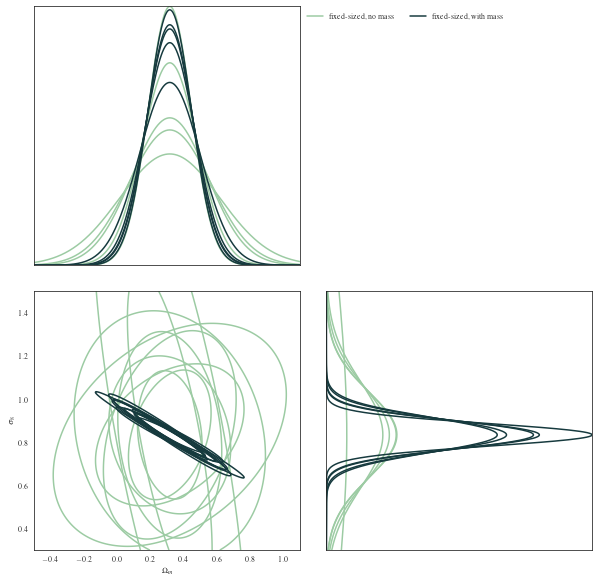

In [831]:
for i,f in enumerate(masscut_results['fixed']['nomass']['Fs_al']):


    GA = imnn.lfi.GaussianApproximation(
        parameter_estimates=θ_fid,
        invF=np.expand_dims(np.linalg.inv(f), 0),
        prior=__prior,
        gridsize=400)

    if i==0:
        ax = GA.marginal_plot(
            #known=θ_fid,
            label='fixed-sized, no mass',
            format=True,
            axis_labels=["$\Omega_m$", "$\sigma_8$"],
            #colours=colours[i]
        );
    else:
        GA.marginal_plot(
            ax=ax,
            format=True,
            axis_labels=["$\Omega_m$", "$\sigma_8$"],
            
        )
            #colours=colours[i]
    
for i,f in enumerate(masscut_results['fixed']['mass']['Fs_al']):
    GA = imnn.lfi.GaussianApproximation(
        parameter_estimates=θ_fid,
        invF=np.expand_dims(np.linalg.inv(f), 0),
        prior=__prior,
        gridsize=400)


    if i==0:
        GA.marginal_plot(
            ax=ax,
            label='fixed-sized, with mass',
            format=True,
            axis_labels=["$\Omega_m$", "$\sigma_8$"],
            colours='C3'
        );
    else:
        GA.marginal_plot(
            ax=ax,
            format=True,
            axis_labels=["$\Omega_m$", "$\sigma_8$"],
            colours='C3'
    );

In [763]:
print('epistemic error for fixed, no mass', np.std(dets_no_mass_ep))
print('aleatoric error for fixed, no mass', np.std(dets_no_mass_al))

epistemic error for fixed, no mass 0.4727059
aleatoric error for fixed, no mass 1.0572687


In [746]:
F_masscut_nomass = np.load('./masscut_nomass/interaction_1/r20/IMNN_F.npy')
F_masscut_mass = np.load('./masscut/interaction_1/r20/IMNN_F.npy')

In [747]:
F_masscut_nomass = np.load('./masscut_nomass/interaction_1/r20/IMNN_F.npy')
F_masscut_mass = np.load('./masscut/interaction_1/r20/IMNN_F.npy')

In [748]:
np.log(np.linalg.det(F_masscut_nomass))

4.5490017

In [749]:
np.linalg.det(F_masscut_mass)

4945.4263

In [750]:
149914 / np.linalg.det(IMNN_clean) * 100

0.24183314109738613

In [751]:
np.log(np.linalg.det(IMNN_clean))

17.942494551551945

In [752]:
np.log(149914)

11.917817075326656

In [753]:
np.log(np.linalg.det(F_2PCF))

14.194570853109674

In [ ]:
149914

# now with noisy masses during training !

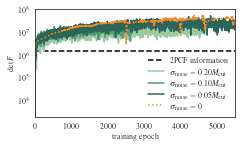

In [16]:
fig = plt.figure()

latexify(fig_width=colwidth)
parent_folders = ['vary_mass/', 'vary_mass/']
graphtypes = [f'invariant graphs', f'non-invariant graphs']

folder = './noisy_mass/interaction_2/'

noise = [0, 5, 10, 20][::-1]

plt.axhline(np.linalg.det(F_2PCF), linestyle='--', color='k', label='2PCF information')
    
for i,n in enumerate(noise):


#     history = load_obj(folder + 'noise%d/IMNN_history.pkl'%(n))
#     plt.plot(history['val_detF'], label=r'no edge labels', color='C0')

    history = load_obj(folder + 'noise%d/IMNN_history.pkl'%(n))
    if n == 0:
        l = r'$\sigma_{\rm noise}=0$'
        colour='#FF8624'
        ls=':'
    else:
        l = r'$\sigma_{\rm noise}=%.2f M_{\rm cut}$'%(n/100)
        colour=None
        ls='solid'
        
    plt.plot(history['val_detF'], label=l, color=colour, ls=ls)
    
plt.yscale('log')
plt.ylim(2e3, 1e8)
plt.xlim(0, 5500)
plt.legend(framealpha=0., loc='lower right')
plt.xlabel('training epoch')
plt.ylabel(r'$\det F$')
plt.tight_layout()
#plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/noisetraining.png', dpi=900)
#plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/noisetraining.svg', dpi=400)

In [17]:
lo = [0.18, 0.65]
hi = [0.48, 0.98]

prior = tfp.distributions.Blockwise(
    [tfp.distributions.Uniform(low=low, high=high)
     for low, high in zip(lo, hi)])
prior.low = np.array(lo)
prior.high = np.array(hi)

In [18]:
folder = './noisy_mass/interaction_2/'
noise = [0, 5, 10, 20] #[::-1]
noise_Fs = [np.load(folder + 'noise%d/IMNN_F.npy'%(n)) for n in noise]

noise_Fs.append(np.array([[ 2309.3381,  3879.6782],
             [ 3879.6777, 10537.743 ]]))

noise.append(40)

noise = noise[::-1]
noise_Fs = noise_Fs[::-1]

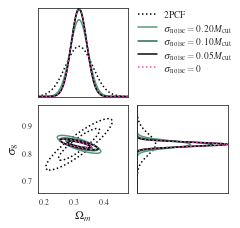

In [642]:
fig,ax = plt.subplots(figsize=(colwidth, colwidth), ncols=2, nrows=2)

latexify(fig_width=colwidth*2)

GA1 = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,#IMNN.get_estimate(target_data),
    invF=np.expand_dims(np.linalg.inv(F_2PCF), 0),
    prior=prior,
    
    gridsize=500)
GA1.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="2PCF",
    linestyle=':',
    format=True,
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="k");

colours = ["C1", "C2", "C5", "C6"][::]
names = [r'$\sigma_{\rm noise}=%.2f M_{\rm cut}$'%(n/100) for n in noise]

handles, labels = plt.gca().get_legend_handles_labels()
_labels = []

for i,f in enumerate(noise_Fs[1:]):


    GA = imnn.lfi.GaussianApproximation(
        parameter_estimates=θ_fid,
        invF=np.expand_dims(np.linalg.inv(f), 0),
        prior=prior,
        gridsize=400)

    GA.marginal_plot(
        ax=ax,
        #known=θ_fid,
        #label=labels[i],
        format=True,
        axis_labels=["$\Omega_m$", "$\sigma_8$"],
        colours=colours[i]
    );
    
    ga_line = plt.Line2D([0], [0], label=names[i], color=colours[i], linestyle='-')
    _labels.append(ga_line)
    
    
GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(noise_Fs[-1]), 0),
    prior=prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="known mass",
    linestyle=':',
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours="#E151AF");
    
    
line2pcf = plt.Line2D([0], [0], label='2PCF', color='k', linestyle=':')
lineclean = plt.Line2D([0], [0], label=r'$\sigma_{\rm noise}=0$', color='#E151AF', linestyle=':')
handles.extend([line2pcf, *_labels, lineclean])


plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0, 1].legend(handles=handles, framealpha=0.0, fontsize=9.5, 
                ncol=1, 
                bbox_to_anchor=(1.12,1.075))

ax[1,0].set_xlabel(r"$\Omega_m$", fontsize=12)
ax[1,0].set_ylabel(r"$\sigma_8$", fontsize=12)

#plt.tight_layout()


#plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/F_vary_mass.svg', dpi=400)
plt.show()

In [21]:
oms = np.load('new_oms.npy')
s8s = np.load('fitted_s8.npy')
x = np.load('x.npy')
y = np.load('y.npy')
dndms = np.load('dndms.npy')

In [24]:
lo = [0.2, 0.7]
hi = [0.415, 0.95]

_prior = tfp.distributions.Blockwise(
    [tfp.distributions.Uniform(low=low, high=high)
     for low, high in zip(lo, hi)])
_prior.low = np.array(lo)
_prior.high = np.array(hi)

In [25]:
prior.low

array([0.18, 0.65])

In [26]:
F_2PCF = np.array(([[ 2275.48905284, -2304.95181558],
       [-2304.95181558,  2976.81677819]]))

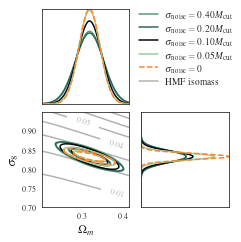

In [28]:
fig,ax = plt.subplots(figsize=(colwidth, colwidth), ncols=2, nrows=2)

#latexify(fig_width=colwidth*3)

ind = [1, 4,5]

dndms = dndms #np.array(dndms).reshape(x.shape)
contours = ax[1,0].contour(x, y, (fsigmas), levels=10, colors='black', alpha=0.3)
plt.clabel(contours, inline=True, fontsize=8, levels=contours.levels[ind])


#plt.scatter(*θ_fid, marker='*')
#plt.colorbar()
#plt.xlabel('$\Omega_m$')
#plt.ylabel('$\sigma_8$')
#plt.title('isomass contours')

#ax[1, 0]

#_prior = prior

# GA1 = imnn.lfi.GaussianApproximation(
#     parameter_estimates=θ_fid,#IMNN.get_estimate(target_data),
#     invF=np.expand_dims(np.linalg.inv(F_2PCF), 0),
#     prior=_prior,
    
#     gridsize=500)
# GA1.marginal_plot(
#     ax=ax,
#     #known=θ_fid,
#     #label="2PCF",
#     linestyle=':',
#     format=True,
#     axis_labels=["$\Omega_m$", "$\sigma_8$"],
#     colours="k");

colours = ["C1", "C2", "C5", "C6"][::]
names = [r'$\sigma_{\rm noise}=%.2f M_{\rm cut}$'%(n/100) for n in noise]

handles, labels = plt.gca().get_legend_handles_labels()
_labels = []

for i,f in enumerate(noise_Fs[:-1]):


    GA = imnn.lfi.GaussianApproximation(
        parameter_estimates=θ_fid,
        invF=np.expand_dims(np.linalg.inv(f), 0),
        prior=_prior,
        gridsize=400)

    ax = GA.marginal_plot(
        ax=ax,
        #known=θ_fid,
        #label=labels[i],
        format=True,
        axis_labels=["$\Omega_m$", "$\sigma_8$"],
        colours=colours[i]);
    
    ga_line = plt.Line2D([0], [0], label=names[i], color=colours[i], linestyle='-')
    _labels.append(ga_line)
    
    
GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(noise_Fs[-1]), 0),
    prior=_prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="known mass",
    linestyle='--',
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours='#FF8624'); #"#E151AF"
    
    
line2pcf = plt.Line2D([0], [0], label='2PCF', color='k', linestyle=':')
lineclean = plt.Line2D([0], [0], label=r'$\sigma_{\rm noise}=0$', color='#FF8624', linestyle='--')

infoline = plt.Line2D([0], [0], label=r'isomass line $M_{\rm cut}$', color='k', linestyle='solid')
hmfline = plt.Line2D([0], [0], label=r'HMF isomass', color='gray', linestyle='-', alpha=0.6)

handles.extend([*_labels, lineclean, hmfline])


plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0, 1].legend(handles=handles, framealpha=0.0, fontsize=9.5, 
                ncol=1, 
                bbox_to_anchor=(1.12,1.075))

ax[1,0].set_xlabel(r"$\Omega_m$", fontsize=12)
ax[1,0].set_ylabel(r"$\sigma_8$", fontsize=12)

#ax[1,0].plot(oms, s8s, color='k', ls='solid')

plt.tight_layout()


plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/noisegraph.png', dpi=400)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(colwidth, colwidth), ncols=2, nrows=2)

#latexify(fig_width=colwidth*3)

ind = [1, 4,5]

dndms = dndms #np.array(dndms).reshape(x.shape)
contours = ax[1,0].contour(x, y, (fsigmas), levels=10, colors='black', alpha=0.3)
plt.clabel(contours, inline=True, fontsize=8, levels=contours.levels[ind])


#plt.scatter(*θ_fid, marker='*')
#plt.colorbar()
#plt.xlabel('$\Omega_m$')
#plt.ylabel('$\sigma_8$')
#plt.title('isomass contours')

#ax[1, 0]

#_prior = prior

# GA1 = imnn.lfi.GaussianApproximation(
#     parameter_estimates=θ_fid,#IMNN.get_estimate(target_data),
#     invF=np.expand_dims(np.linalg.inv(F_2PCF), 0),
#     prior=_prior,
    
#     gridsize=500)
# GA1.marginal_plot(
#     ax=ax,
#     #known=θ_fid,
#     #label="2PCF",
#     linestyle=':',
#     format=True,
#     axis_labels=["$\Omega_m$", "$\sigma_8$"],
#     colours="k");

colours = ["C1", "C2", "C5"][::]
names = [r'$\sigma_{\rm noise}=%.2f M_{\rm cut}$'%(n/100) for n in noise]

handles, labels = plt.gca().get_legend_handles_labels()
_labels = []

for i,f in enumerate(noise_Fs[:-1]):


    GA = imnn.lfi.GaussianApproximation(
        parameter_estimates=θ_fid,
        invF=np.expand_dims(np.linalg.inv(f), 0),
        prior=_prior,
        gridsize=400)

    ax = GA.marginal_plot(
        ax=ax,
        #known=θ_fid,
        #label=labels[i],
        format=True,
        axis_labels=["$\Omega_m$", "$\sigma_8$"],
        colours=colours[i]);
    
    ga_line = plt.Line2D([0], [0], label=names[i], color=colours[i], linestyle='-')
    _labels.append(ga_line)
    
    
GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(noise_Fs[-1]), 0),
    prior=_prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="known mass",
    linestyle='--',
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours='#FF8624'); #"#E151AF"
    
    
line2pcf = plt.Line2D([0], [0], label='2PCF', color='k', linestyle=':')
lineclean = plt.Line2D([0], [0], label=r'$\sigma_{\rm noise}=0$', color='#FF8624', linestyle='--')

infoline = plt.Line2D([0], [0], label=r'isomass line $M_{\rm cut}$', color='k', linestyle='solid')
hmfline = plt.Line2D([0], [0], label=r'HMF isomass', color='gray', linestyle='-', alpha=0.6)

handles.extend([*_labels, lineclean, hmfline])


plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0, 1].legend(handles=handles, framealpha=0.0, fontsize=9.5, 
                ncol=1, 
                bbox_to_anchor=(1.12,1.075))

ax[1,0].set_xlabel(r"$\Omega_m$", fontsize=12)
ax[1,0].set_ylabel(r"$\sigma_8$", fontsize=12)

#ax[1,0].plot(oms, s8s, color='k', ls='solid')

plt.tight_layout()


#plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/F_vary_mass_fsigma.svg', dpi=400)
plt.show()

In [19]:
noise_Fs

[array([[ 2309.3381,  3879.6782],
        [ 3879.6777, 10537.743 ]]),
 array([[ 3134.0054,  5851.8545],
        [ 5851.855 , 14934.926 ]], dtype=float32),
 array([[ 3000.6235,  5065.837 ],
        [ 5065.837 , 13877.709 ]], dtype=float32),
 array([[ 3370.3535,  6820.6943],
        [ 6820.6943, 24480.738 ]], dtype=float32),
 array([[ 3652.808,  8877.604],
        [ 8877.604, 36829.07 ]], dtype=float32)]

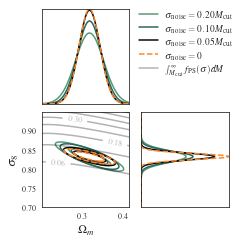

In [1137]:
fig,ax = plt.subplots(figsize=(colwidth, colwidth), ncols=2, nrows=2)

#latexify(fig_width=colwidth*3)

ind = [1, 3, 5]

contours = ax[1,0].contour(x, y, (int_fsigmas_end2), levels=14, colors='black', alpha=0.3, zorder=10)
ind = [1, 3, 5]
manual_locs = [(0.24, 0.81), (0.38, 0.87), (0.284, 0.95)]
plt.clabel(contours, inline=True, fontsize=8, levels=contours.levels[ind], use_clabeltext=True, 
           manual=manual_locs,
           inline_spacing=1.9)


#plt.scatter(*θ_fid, marker='*')
#plt.colorbar()
#plt.xlabel('$\Omega_m$')
#plt.ylabel('$\sigma_8$')
#plt.title('isomass contours')

#ax[1, 0]

#_prior = prior

# GA1 = imnn.lfi.GaussianApproximation(
#     parameter_estimates=θ_fid,#IMNN.get_estimate(target_data),
#     invF=np.expand_dims(np.linalg.inv(F_2PCF), 0),
#     prior=_prior,
    
#     gridsize=500)
# GA1.marginal_plot(
#     ax=ax,
#     #known=θ_fid,
#     #label="2PCF",
#     linestyle=':',
#     format=True,
#     axis_labels=["$\Omega_m$", "$\sigma_8$"],
#     colours="k");

colours = ["C1", "C2", "C5"][::]
names = [r'$\sigma_{\rm noise}=%.2f M_{\rm cut}$'%(n/100) for n in noise]

handles, labels = plt.gca().get_legend_handles_labels()
_labels = []



for i,f in enumerate(noise_Fs[:-1]):


    GA = imnn.lfi.GaussianApproximation(
        parameter_estimates=θ_fid,
        invF=np.expand_dims(np.linalg.inv(f), 0),
        prior=_prior,
        gridsize=400)

    ax = GA.marginal_plot(
        ax=ax,
        #known=θ_fid,
        #label=labels[i],
        format=True,
        axis_labels=["$\Omega_m$", "$\sigma_8$"],
        colours=colours[i]);
    
    ga_line = plt.Line2D([0], [0], label=names[i], color=colours[i], linestyle='-')
    _labels.append(ga_line)
    
    
GA = imnn.lfi.GaussianApproximation(
    parameter_estimates=θ_fid,
    invF=np.expand_dims(np.linalg.inv(noise_Fs[-1]), 0),
    prior=_prior,
    gridsize=400)

GA.marginal_plot(
    ax=ax,
    #known=θ_fid,
    #label="known mass",
    linestyle='--',
    axis_labels=["$\Omega_m$", "$\sigma_8$"],
    colours='#FF8624'); #"#E151AF"
    
    
line2pcf = plt.Line2D([0], [0], label='2PCF', color='k', linestyle=':')
lineclean = plt.Line2D([0], [0], label=r'$\sigma_{\rm noise}=0$', color='#FF8624', linestyle='--')

infoline = plt.Line2D([0], [0], label=r'isomass line $M_{\rm cut}$', color='k', linestyle='solid')
#hmfline = plt.Line2D([0], [0], label=r'HMF isomass', color='gray', linestyle='-', alpha=0.6)
hmfline = plt.Line2D([0], [0], label=r'$\int^\infty_{M_{\rm cut}} f_{\rm PS}(\sigma) dM$', color='gray', linestyle='-', alpha=0.6)

handles.extend([*_labels, lineclean, hmfline])


plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0, 1].legend(handles=handles, framealpha=0.0, fontsize=9.5, 
                ncol=1, 
                bbox_to_anchor=(1.12,1.075))

ax[1,0].set_xlabel(r"$\Omega_m$", fontsize=12)
ax[1,0].set_ylabel(r"$\sigma_8$", fontsize=12)

#ax[1,0].plot(oms, s8s, color='k', ls='solid')

plt.tight_layout()

plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/F_vary_mass_intfsigma.png', dpi=900)
plt.savefig('/Users/lucas/Documents/Documents - MacBook Pro di Admin/imperial/graphimnns/F_vary_mass_intfsigma.svg', dpi=400)
plt.show()

In [272]:
s8s

array([0.83743993, 0.83718799, 0.83695976, 0.8367531 , 0.83656579,
       0.83639602, 0.83624202, 0.83610187, 0.83597465, 0.83585892,
       0.83575379, 0.83565783, 0.83557046, 0.83549067, 0.83541798,
       0.83535117, 0.83529037, 0.83523431, 0.83518271, 0.83513526,
       0.83509108, 0.83505026, 0.83501211, 0.83497649, 0.83494313,
       0.83491176, 0.83488199, 0.83485412, 0.83482729, 0.83480164,
       0.83477721, 0.83475388, 0.83473121, 0.83470932, 0.83468839,
       0.83466794, 0.83464829, 0.8346292 , 0.83461062, 0.83459268,
       0.83457517, 0.83455844, 0.834542  , 0.83452642, 0.83451096,
       0.83449639, 0.83448195, 0.8344682 , 0.83445499, 0.83444222])

In [266]:
!pip install colossus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.7/197.7 KB 4.4 MB/s eta 0:00:000:00:01
You should consider upgrading via the '/usr/local/anaconda3/bin/python -m pip install --upgrade pip' command.


In [267]:
from colossus.cosmology import cosmology
from colossus.lss import mass_function

cosmology.setCosmology('WMAP9')
mfunc_so = mass_function.massFunction(1E12, 0.0, mdef = 'vir', model = 'tinker08')
mfunc_fof = mass_function.massFunction(1E12, 0.0, mdef = 'fof', model = 'watson13')

In [268]:
mfunc_fof

0.30477947143567846

In [264]:
# find mass dependence on Om, s8:
import jax_cosmo as jc

Ωde = 1.- 0.3175 - 0.049 

def g_z(Ωm, z=0, Ωde=Ωde):
    return (5/2.)*Ωm*(1./(Ωm**(4./7.) - Ωde + (1 + Ωm/2.)*(1 + Ωde/70)))

def D_z(Ωm, z=0, Ωde=Ωde):
    return g_z(Ωm, z=z, Ωde=Ωde) / (g_z(Ωm, z=0, Ωde=Ωde)*(1. + z))

def ν(Ωm, σ8, z=0, δc=1.69, Ωde=Ωde):
    return δc / (D_z(Ωm, z=0, Ωde=Ωde)*σ8)




In [263]:
g_z(0.3)

0.7285121442763621

In [253]:
jc.Planck15()

Cosmological parameters: 
    h:        0.6774 
    Omega_b:  0.0486 
    Omega_c:  0.2589 
    Omega_k:  0.0 
    w0:       -1.0 
    wa:       0.0 
    n:        0.9667 
    sigma8:   0.8159

In [254]:
θ_fid

array([0.3175, 0.834 ])

In [269]:
θ_fid

array([0.3175, 0.834 ])

# calculate line through

In [310]:
import cloudpickle as pickle

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f)

def load_obj(name ):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [311]:
# halo data
fiducial = load_obj('halodata/fid.pkl')
validation_fiducial = load_obj('halodata/val_fid.pkl')

numerical_derivative = load_obj('halodata/derv.pkl')
validation_numerical_derivative = load_obj('halodata/val_derv.pkl')

In [561]:
np.min(fiducial.n_node)

73

In [562]:
np.max(fiducial.n_node)

140

In [364]:
dervs = validation_numerical_derivative.n_node #np.mean(validation_numerical_derivative.n_node.reshape(2, 2, -1), axis=1)

In [366]:
δθ = 2*np.array([0.01, 0.015])
n_d = 250
n_param = 2


x_mp = dervs.reshape(n_d, n_param, 2, dervs.shape[-1])

# compute finite-differences for derivatives
_dervs = (x_mp[:, :, 1, :] - x_mp[:, :, 0, :]) / np.expand_dims(np.expand_dims(δθ, 0), -1) #np.swapaxes(x_mp[:, :, 1] - x_mp[:, :, 0], 1, 2) / δθ

# take mean
_dervs = np.mean(_dervs, axis=0)

In [370]:
_dervs.shape

(2, 1)

In [374]:
dy =  (_dervs[0, 0] /_dervs[1, 0]) * 0.01

In [375]:
dy

-0.013456624075319444

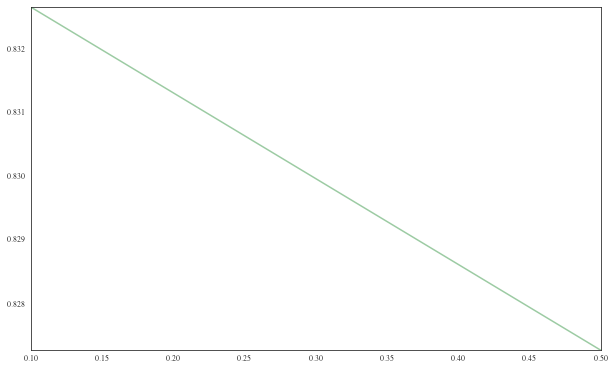

In [383]:
_x = np.linspace(0.1, 0.5, num=50)
plt.plot(_x, _x*dy + θ_fid[1])

In [ ]:
dy = - (fx/fy) dx.